In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import aup

In [11]:
url = "hippocampus.cswst4rid7eb.us-east-2.rds.amazonaws.com"
user = "jane"
pw = "jacobs1916"
db = "postgres"

In [28]:
category_code = '464111'
category_name = 'Farmacias'
year = 2020


In [36]:
engine = create_engine("postgresql://{user}:{pw}@{url}/{db}".format(user=str(user), pw=str(pw), url=str(url), db=str(db)))

In [37]:
def gdf_hex(year, category_code, category_name):
    query = f'SELECT\
            hex.hex_id_8 AS hex_id_8,\
            hex.geometry as geometry,\
            Count(denue.codigo_act) AS {category_name}\
            FROM "hexgrid"."hexgrid_mx" AS hex\
            JOIN denue.denue_{year} AS denue\
            ON ST_Intersects(hex.geometry, denue.geometry)\
            WHERE denue.codigo_act = {category_code}\
            GROUP BY hex.hex_id_8, hex.geometry;'
    gdf = gpd.GeoDataFrame.from_postgis(query, engine, geom_col='geometry')
    return gdf

In [38]:
gdf10 = gdf_hex(2010,464111,'Farmacias')
gdf20 = gdf_hex(2020,464111,'Farmacias')

In [44]:
gdf = pd.merge(gdf10,gdf20,on=['hex_id_8','geometry'], suffixes=('_2010', '_2020'))
gdf['cambio'] = gdf.farmacias_2020 - gdf.farmacias_2010

In [45]:
gdf.head()

,hex_id_8,geometry,farmacias_2010,farmacias_2020,cambio
0,8829a4c001fffff,"POLYGON ((-116.90047 32.50220, -116.89472 32.5...",1,2,1
1,8829a4c003fffff,"POLYGON ((-116.90857 32.51376, -116.90739 32.5...",4,1,-3
2,8829a4c005fffff,"POLYGON ((-116.89134 32.50908, -116.89016 32.5...",3,1,-2
3,8829a4c007fffff,"POLYGON ((-116.88795 32.51753, -116.89369 32.5...",4,3,-1
4,8829a4c00dfffff,"POLYGON ((-116.88780 32.49408, -116.88324 32.4...",2,5,3


In [47]:
gdf.sort_values('cambio', ascending=False)

,hex_id_8,geometry,farmacias_2010,farmacias_2020,cambio
8122,8849a96653fffff,"POLYGON ((-105.23323 20.60116, -105.23385 20.6...",8,30,22
4647,884990c91bfffff,"POLYGON ((-97.24500 19.76221, -97.24047 19.765...",18,38,20
3026,884982910dfffff,"POLYGON ((-99.94864 19.71562, -99.95357 19.717...",1,21,20
4560,88499059b7fffff,"POLYGON ((-97.05992 20.07002, -97.06446 20.067...",11,29,18
2874,8849819713fffff,"POLYGON ((-102.28258 19.97783, -102.27805 19.9...",33,51,18
...,...,...,...,...,...
245,884509b15bfffff,"POLYGON ((-89.61654 20.95896, -89.61207 20.961...",23,16,-7
7041,884995b1a5fffff,"POLYGON ((-99.24218 19.46197, -99.24670 19.459...",17,10,-7
214,884509b067fffff,"POLYGON ((-89.62094 20.96638, -89.62538 20.968...",29,19,-10
9973,886d34da43fffff,"POLYGON ((-96.12994 19.18745, -96.13017 19.192...",32,16,-16


0.781335952848723


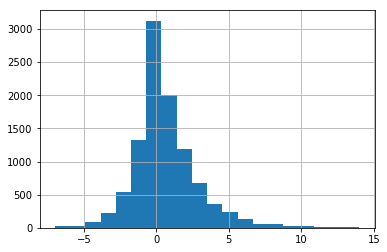

In [58]:
print(gdf[(gdf['cambio']>-10) & (gdf['cambio']<15)].cambio.mean())
gdf[(gdf['cambio']>-10) & (gdf['cambio']<15)].cambio.hist(bins=20)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(30,15))
gdf_hex.plot(color='grey',zorder=-1)
gdf.plot(column='farmacias',ax=ax,zorder=1)

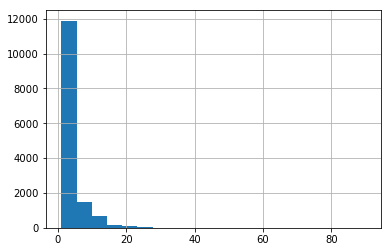

In [32]:
gdf.farmacias.hist(bins=20)

In [33]:
gdf.sort_values('farmacias',ascending=False)

,hex_id_8,geometry,farmacias
137,8829a4c757fffff,"POLYGON ((-117.03592 32.52952, -117.03136 32.5...",90
6300,88498c96adfffff,"POLYGON ((-103.34833 20.67931, -103.34379 20.6...",60
3374,8848b398c5fffff,"POLYGON ((-97.94626 26.05510, -97.94658 26.060...",55
4361,8849819713fffff,"POLYGON ((-102.28258 19.97783, -102.27805 19.9...",51
6915,884990c91bfffff,"POLYGON ((-97.24500 19.76221, -97.24047 19.765...",38
...,...,...,...
3718,8848ec4581fffff,"POLYGON ((-110.97515 31.30292, -110.97422 31.2...",1
10070,884995b28bfffff,"POLYGON ((-99.37894 19.38939, -99.38346 19.386...",1
10069,884995b289fffff,"POLYGON ((-99.37294 19.37174, -99.36842 19.374...",1
3720,8848ec458dfffff,"POLYGON ((-110.96192 31.28897, -110.95716 31.2...",1
